# Unfixed Polynomial Regression with SGD

This notebook evaluates convergence behavior and generalization performance of SGD on synthetic polynomial data with randomly generated coefficients. We compare our three stepsize strategies — fixed, halving, and diminishing — using both training and test error over 20 randomized trials.


In [7]:
import sys
sys.path.append("..") 

import numpy as np
import matplotlib.pyplot as plt
from SGD.sgd import SGD
from data.generate_synthetic_data import generate_training_data_unfixed
from sklearn.model_selection import train_test_split

### Summary of Train/Test Error Over 20 Runs

We generate new synthetic data each time and report mean ± std of final losses.

Final Loss: 1542.0576557719835


In [8]:
degrees = [1, 2, 3, 4]
n_runs = 20
noise = 0.01
m, n = 100, 2

results_summary = {}

for degree in degrees:
    train_losses = {"fixed": [], "halving": [], "diminishing": []}
    test_losses = {"fixed": [], "halving": [], "diminishing": []}
    
    for run in range(n_runs):
        X, y, _ = generate_training_data_unfixed(m=m, n=n, noise=noise, model_type='polynomial', degree=3)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        sgd = SGD(X_train, y_train, num_iterations=5000, degree=degree)

        for method in ["fixed", "halving", "diminishing"]:
            w, obj, grad, dist = sgd.optimize(stepsize_type=method)
            train_losses[method].append(obj[-1])
            X_test_model = sgd.generate_polynomial_features(X_test, degree=degree)
            test_pred = X_test_model @ w
            test_loss = np.mean((test_pred - y_test) ** 2)
            test_losses[method].append(test_loss)

    results_summary[degree] = {"train": train_losses, "test": test_losses}
# --- Print summary
for degree in degrees:
    print(f"\nDegree {degree}:")
    for method in ["fixed", "halving", "diminishing"]:
        tr = results_summary[degree]["train"][method]
        te = results_summary[degree]["test"][method]
        print(f"{method.capitalize()} Results:")
        print(f"  Train Loss  - Mean: {np.mean(tr):.4f}, Std: {np.std(tr):.4f}")
        print(f"  Test Loss   - Mean: {np.mean(te):.4f}, Std: {np.std(te):.4f}")


Degree 1:
Fixed Results:
  Train Loss  - Mean: 908.7487, Std: 993.1333
  Test Loss   - Mean: 1828.3175, Std: 2067.0669
Halving Results:
  Train Loss  - Mean: 908.7550, Std: 993.1617
  Test Loss   - Mean: 1828.3406, Std: 2067.1524
Diminishing Results:
  Train Loss  - Mean: 908.7621, Std: 993.1579
  Test Loss   - Mean: 1828.3550, Std: 2067.1649

Degree 2:
Fixed Results:
  Train Loss  - Mean: 654.6563, Std: 853.2704
  Test Loss   - Mean: 1495.9821, Std: 2453.6004
Halving Results:
  Train Loss  - Mean: 654.6563, Std: 853.2704
  Test Loss   - Mean: 1495.9821, Std: 2453.6004
Diminishing Results:
  Train Loss  - Mean: 654.6563, Std: 853.2704
  Test Loss   - Mean: 1495.9821, Std: 2453.6004

Degree 3:
Fixed Results:
  Train Loss  - Mean: 729.6864, Std: 662.3949
  Test Loss   - Mean: 1827.6029, Std: 1698.6863
Halving Results:
  Train Loss  - Mean: 729.6864, Std: 662.3949
  Test Loss   - Mean: 1827.6029, Std: 1698.6863
Diminishing Results:
  Train Loss  - Mean: 729.6864, Std: 662.3949
  Test Los

### Convergence Plots (Single Run)

Here, we show the distance to optimum, gradient norm, and suboptimality gap over 5000 iterations on one synthetic dataset for polynomial degree 3 for the correct model type.

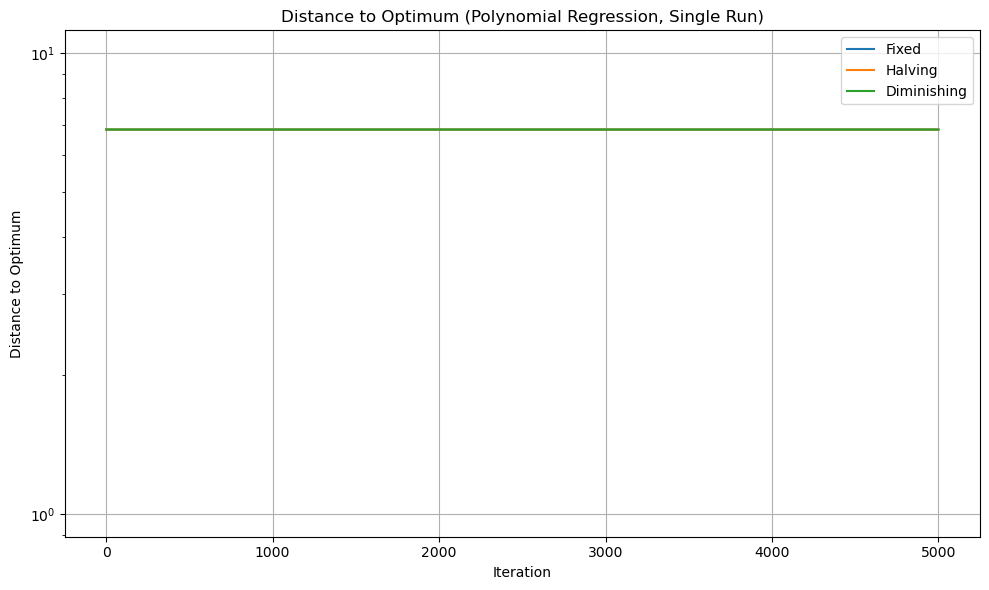

In [9]:
X, y, true_params = generate_training_data_unfixed(m=100, n=2, noise=0.01, model_type='polynomial', degree=3)
sgd = SGD(X, y, num_iterations=5000, noise=0.01, degree=3)

results = {}
for method in ["fixed", "halving", "diminishing"]:
    w, obj, grad, dist = sgd.optimize(stepsize_type=method)
    results[method] = {
        "w": w,
        "obj": obj,
        "grad": grad,
        "dist": dist
    }

# Plot: Distance to optimum vs. iteration
plt.figure(figsize=(10, 6))
for method in results:
    plt.plot(results[method]["dist"], label=method.capitalize())
plt.xlabel("Iteration")
plt.ylabel("Distance to Optimum")
plt.yscale("log")
plt.title("Distance to Optimum (Polynomial Regression, Single Run)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

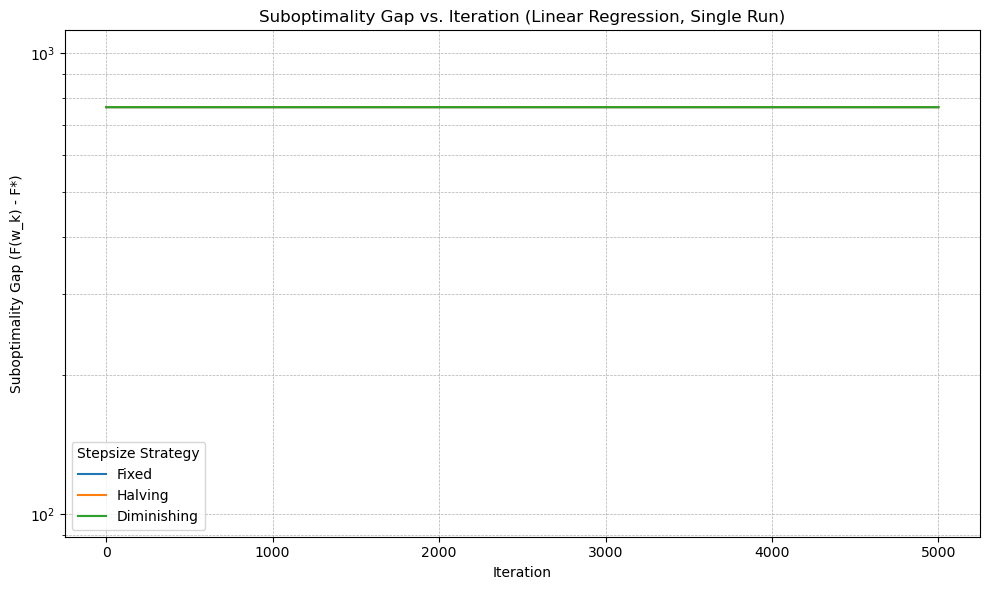

In [10]:
plt.figure(figsize=(10, 6))
plt.yscale("log")

for method in results:
    subopt_gap = results[method]["obj"] - sgd.F_star
    plt.plot(subopt_gap, label=method.capitalize())

plt.xlabel("Iteration")
plt.ylabel("Suboptimality Gap (F(w_k) - F*)")
plt.title("Suboptimality Gap vs. Iteration (Linear Regression, Single Run)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Stepsize Strategy")
plt.tight_layout()
plt.show()

### Theoretical Constants

The following constants were computed from the problem to derive the various stepsizes.

In [11]:
print("SGD Parameters for Unfixed Linear Run:")
print("="*60)
print(f"L (Lipschitz constant): {sgd.L:.4f}")
print(f"c: {sgd.c:.4f}")
print(f"M_G: {sgd.M_G:.4f}")
print(f"M: {sgd.M:.4f}")
print(f"M_V: {sgd.M_V:.4f}")
print(f"mu: {sgd.mu:.4f}")
print(f"mu_G: {sgd.mu_G:.4f}")
print(f"Diminishing stepsize (beta): {sgd.beta:.6f}")
print(f"Diminishing stepsize (gama): {sgd.gamma:.6f} \n")
print(f"Fixed stepsize (alpha): {sgd.fixed_alpha:.6f}")

print("\n" + "="*60)
print("True Parameters (used to generate synthetic data):")
print(f"A: {true_params['A']}")
print(f"b: {true_params['b']}")

print("\nLearned Parameters from Each Stepsize Strategy:")
print("-" * 60)
for method in results:
    w_method = results[method]["w"]
    print(f"{method.capitalize()} stepsize:")
    print(f"  Bias term (w_0): {w_method[0]:.4f}")
    print(f"  Weights (w_1,w_2: {w_method[1:]}")

SGD Parameters for Unfixed Linear Run:
L (Lipschitz constant): 23100976327.0770
c: 0.0000
M_G: 16758391354866360385536.0000
M: 4787655.1479
M_V: 16758391354866360385536.0000
mu: 1.0000
mu_G: 1.0000
Diminishing stepsize (beta): 1000000.000000
Diminishing stepsize (gama): 387135201968659982802400074643139461120.000000 

Fixed stepsize (alpha): 0.000000

True Parameters (used to generate synthetic data):
A: [ 0.20378283  2.05325799  1.17318559 -0.5595928   0.21931309 -1.12204985
 -0.46929499 -0.6493654   1.87312664]
b: 0.25445220037088206

Learned Parameters from Each Stepsize Strategy:
------------------------------------------------------------
Fixed stepsize:
  Bias term (w_0): 0.0000
  Weights (w_1,w_2: [ 5.08349776e-29  5.59461465e-28 -2.70235939e-28  7.29314878e-28
  2.34383856e-27 -1.98424925e-27  8.59194761e-28  3.60948499e-27
  9.72170180e-27 -2.70235939e-28  2.34383856e-27 -9.95697791e-27
  6.33084442e-27  4.07949343e-26 -1.99003841e-25 -1.03819971e-26
  1.48278361e-25  7.529400